## First data science own project
_Boosting-learning_


In [47]:
# Installing wordcloud library for easy text column manipulation
#!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt

# Loading our stress data
dataset = pd.read_csv('Stress.csv')
print(dataset.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text  label  confidence  \
0  He said he had not felt that way before, sugge...      1         0.8   
1  Hey there r/assistance, Not sure if this is th...      0         1.0   
2  My mom then hit me with the newspaper and it s...      1         0.8   
3  until i met my new boyfriend, he is amazing, h...      1         0.6   
4  October is Domestic Violence Awareness Month a...      1         0.8   

   social_timestamp  
0        1521614353  
1        1527009817  
2        1535935605  
3        1516429555  
4        1539809005  


In [39]:
# Taking another glance on the dataset 
dataset

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [40]:
# Looking at the columns types and features

dataset.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [41]:
dataset.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'label', 'confidence',
       'social_timestamp'],
      dtype='object')

In [42]:
len(dataset)

2838

In [43]:
print(sum(dataset['label']==1))

1488


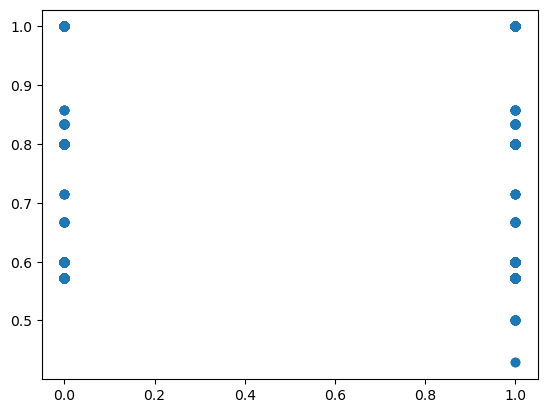

<Figure size 640x480 with 0 Axes>

In [44]:
# Scatter plot showing the correlation between the self-estimated confidence against (label), whether or not they have stress

plt.scatter(dataset.label, dataset.confidence)
plt.show()
plt.clf()

In [45]:
# Checking for any correlation between patients' notes and (label)
# Creating a subset for 'text' and 'label'

t_and_l = dataset[['label', 'text']].copy()
print(t_and_l.head())


   label                                               text
0      1  He said he had not felt that way before, sugge...
1      0  Hey there r/assistance, Not sure if this is th...
2      1  My mom then hit me with the newspaper and it s...
3      1  until i met my new boyfriend, he is amazing, h...
4      1  October is Domestic Violence Awareness Month a...


In [46]:
# Importing some new libraries to convert the 'text' column phrases into a numeric column
from sklearn.feature_extraction.text import TfidfVectorizer

# importing it
from wordcloud import WordCloud

# Preprocess the text: Remove stop words, tokenize, etc.
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
X_tfidf = tfidf.fit_transform(t_and_l['text'])

# Get TF-IDF feature names
feature_names = tfidf.get_feature_names_out()

# Add TF-IDF as features
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

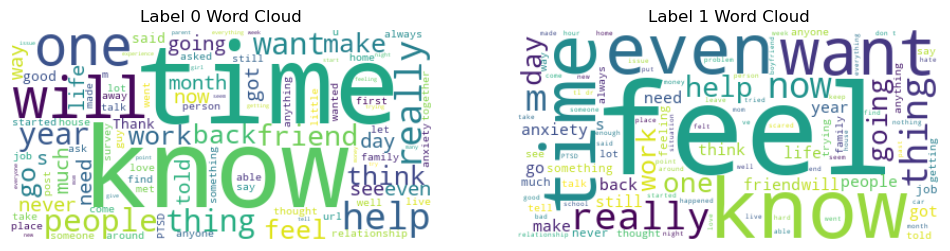

<Figure size 640x480 with 0 Axes>

In [49]:
# Separate data by label
label_0_text = " ".join(t_and_l[t_and_l['label'] == 0]['text'])
label_1_text = " ".join(t_and_l[t_and_l['label'] == 1]['text'])

# Generate word clouds
wc_0 = WordCloud(background_color="white", max_words=100).generate(label_0_text)
wc_1 = WordCloud(background_color="white", max_words=100).generate(label_1_text)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wc_0, interpolation='bilinear')
plt.title("Label 0 Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_1, interpolation='bilinear')
plt.title("Label 1 Word Cloud")
plt.axis('off')
plt.show()
plt.clf()

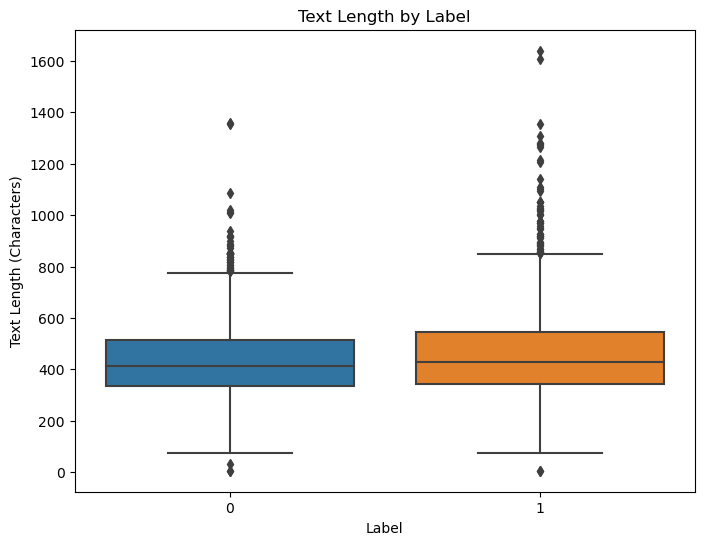

<Figure size 640x480 with 0 Axes>

In [50]:
# Add a text length column
t_and_l['text_length'] = t_and_l['text'].apply(len)

# Boxplot
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=t_and_l, x='label', y='text_length')
plt.title('Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length (Characters)')
plt.show()
plt.clf()

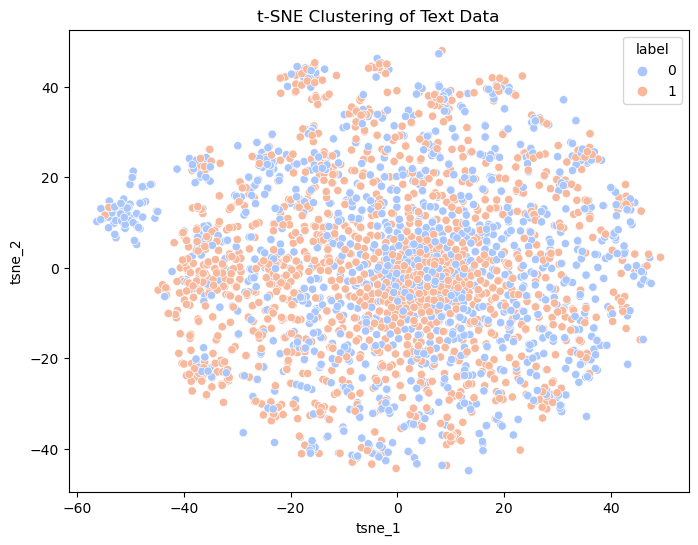

<Figure size 640x480 with 0 Axes>

In [52]:
# Let's visualize clusters using dimensionality reduction.
from sklearn.manifold import TSNE

# Reduce dimensionality of TF-IDF features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Add t-SNE results to the DataFrame
t_and_l['tsne_1'] = X_tsne[:, 0]
t_and_l['tsne_2'] = X_tsne[:, 1]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=t_and_l, x='tsne_1', y='tsne_2', hue='label', palette='coolwarm')
plt.title('t-SNE Clustering of Text Data')
plt.show()
plt.clf()

              precision    recall  f1-score   support

           0       0.64      0.61      0.62       263
           1       0.68      0.70      0.69       305

    accuracy                           0.66       568
   macro avg       0.66      0.66      0.66       568
weighted avg       0.66      0.66      0.66       568



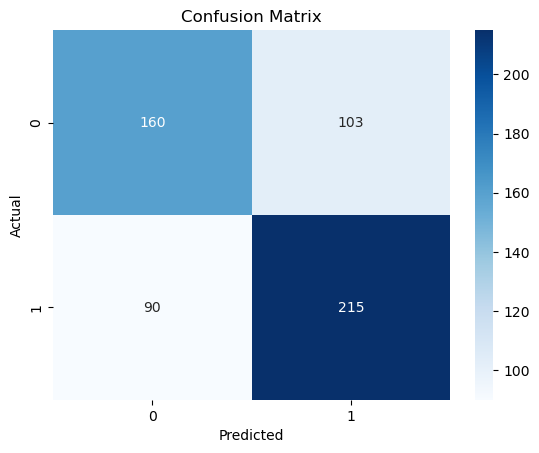

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, t_and_l['label'], test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
